In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
test_scores = pd.read_csv("datasets/Admission and Test Scores/ADM_2015-2021_data.csv")
test_scores.head()

,unitid,admcon1,admcon2,admcon3,admcon4,admcon5,admcon6,admcon7,admcon8,admcon9,...,actcm25,actcm75,acten25,acten75,actmt25,actmt75,satwr25,satwr75,actwr25,year
0,100654,Required,Recommended,Required,Recommended,Neither required nor recommended,Recommended,Considered but not required,Required,Neither required nor recommended,...,15.0,20.0,14.0,20.0,15.0,NaN,NaN,NaN,NaN,2021
1,100663,Required,Neither required nor recommended,Required,Required,Neither required nor recommended,Neither required nor recommended,Considered but not required,Neither required nor recommended,Neither required nor recommended,...,23.0,30.0,23.0,33.0,21.0,NaN,NaN,NaN,NaN,2021
2,100706,Required,Recommended,Required,Neither required nor recommended,Neither required nor recommended,Recommended,Required,Required,Neither required nor recommended,...,24.0,31.0,24.0,32.0,23.0,NaN,NaN,NaN,NaN,2021
3,100724,Required,Neither required nor recommended,Recommended,Neither required nor recommended,Neither required nor recommended,Neither required nor recommended,Considered but not required,Required,Neither required nor recommended,...,15.0,20.0,12.0,22.0,15.0,NaN,NaN,NaN,NaN,2021
4,100751,Required,Recommended,Required,Required,Neither required nor recommended,Neither required nor recommended,Considered but not required,Required,Neither required nor recommended,...,21.0,31.0,21.0,33.0,19.0,NaN,NaN,NaN,NaN,2021


In [3]:
test_scores_copy = test_scores.copy()

In [4]:
test_scores_copy['ftm_ratio'] = test_scores_copy['enrlftm']/test_scores_copy['enrlft']
test_scores_copy['ftw_ratio'] = test_scores_copy['enrlftw']/test_scores_copy['enrlft']

In [5]:
annual_avg = test_scores_copy.groupby('year').mean()

/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_70427/3058517097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_avg = test_scores_copy.groupby('year').mean()


In [6]:
public_fin = pd.read_csv("datasets/Institutional Finances/F_F1A_1415-1920_data.csv", low_memory=False)
public_fin.head()

,unitid,f1a01,f1a31,f1a04,f1a05,f1a06,f1a07,f1a08,f1a09,f1a10,...,f1h03b,f1h03c,f1h03d,f1n01,f1n02,f1n03,f1n04,f1n05,f1n06,year
0,100654,7.853571e+07,1.157264e+08,1.342300e+04,1.157398e+08,1.942755e+08,1623631.0,62725127.0,64348758.0,60180723.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,100663,1.204895e+09,1.538321e+09,1.211609e+09,2.749930e+09,3.954826e+09,34097783.0,470132852.0,504230635.0,874533980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,100706,1.424860e+08,2.383018e+08,7.910217e+07,3.174039e+08,4.598899e+08,4870600.0,68946069.0,73816669.0,98826636.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
3,100724,4.602033e+07,2.988681e+08,1.663636e+07,3.155044e+08,3.615248e+08,6789559.0,33059641.0,39849200.0,213075250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,100733,4.503448e+06,1.334091e+07,8.826359e+06,2.216727e+07,2.667072e+07,0.0,4137096.0,4137096.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415


38619151.02892422


(array([1.0518e+04, 5.9600e+02, 2.1800e+02, 1.5700e+02, 1.2400e+02,
        6.5000e+01, 3.8000e+01, 1.5000e+01, 2.7000e+01, 2.4000e+01,
        1.1000e+01, 1.0000e+01, 8.0000e+00, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 7.75290500e+07, 1.55058100e+08, 2.32587150e+08,
        3.10116200e+08, 3.87645250e+08, 4.65174300e+08, 5.42703350e+08,
        6.20232400e+08, 6.97761450e+08, 7.75290500e+08, 8.52819550e+08,
        9.30348600e+08, 1.00787765e+09, 1.08540670e+09, 1.16293575e+09,
        1.24046480e+09, 1.31799385e+09, 1.39552290e+09, 1.47305195e+09,
        1.55058100e+09]),
 <BarContainer object of 20 artists>)

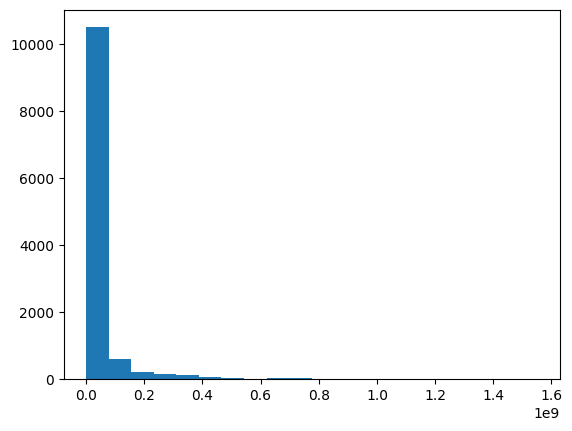

In [7]:
print(public_fin['f1b01'].mean())
plt.hist(public_fin['f1b01'], bins=20)

In [8]:
pnp_fin = pd.read_csv("datasets/Institutional Finances/F_F2_1415-1920_data.csv", low_memory=False)
pnp_fin.head()

,unitid,f2a01,f2a02,f2a03,f2a03a,f2a04,f2a05,f2a05a,f2a05b,f2a06,...,f2h03b,f2h03c,f2h03d,f2i01,f2i02,f2i03,f2i04,f2i05,f2i06,year
0,100690,8543662.0,12008292.0,3194663.0,1809724.0,8214781.0,598848.0,174805.0,424043.0,8813629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,100937,61305817.0,190585869.0,71715038.0,42998028.0,44382667.0,74488164.0,62081919.0,12406245.0,118870831.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,101073,2083800.0,15087642.0,3222053.0,0.0,9373483.0,2492106.0,1673126.0,818980.0,11865589.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
3,101189,20462183.0,90370636.0,42826440.0,32062385.0,30774309.0,16769887.0,11638228.0,5131659.0,47544196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,101435,48319354.0,84633145.0,26677801.0,23063482.0,7279432.0,50675912.0,48286186.0,2389726.0,57955344.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415


In [9]:
pfp_fin = pd.read_csv("datasets/Institutional Finances/F_F3_1415-1920_data.csv", low_memory=False)
pfp_fin.head()

,unitid,f3a01,f3a01a,f3a01b,f3a01c,f3a02,f3a02a,f3a03,f3a04,f3a05,...,f3c17,f3c171,f3c172,f3g01,f3g02,f3g03,f3g04,f3g05,f3g06,year
0,101116,7603406.0,0.0,1537319.0,59268.0,4247351.0,0.0,3356055.0,7603406.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,101277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,101365,10246219.0,0.0,1190304.0,19154.0,179562.0,0.0,10066657.0,10246219.0,1151647.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
3,101958,5462641.0,0.0,1477.0,0.0,218329.0,0.0,5244312.0,5462641.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,102845,42118552.0,0.0,4349235.0,6251743.0,4641880.0,10985.0,37476672.0,42118552.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415


In [10]:
finaid = pd.read_csv('datasets/Student Financial Aid/SFA_1415-2021_data.csv')
finaid.head()

,unitid,scugrad,scugffn,scugffp,scfa2,scfa1n,scfa1p,scfa11n,scfa11p,scfa12n,...,npt411,npt421,npt431,npt441,npt451,npt410,npt420,npt430,npt440,year
0,100654,4210,1198.0,28.0,4210.0,1198.0,28.0,1.0,0.0,818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,100663,11679,1719.0,15.0,11679.0,1719.0,15.0,0.0,0.0,1459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,100690,279,9.0,3.0,279.0,9.0,3.0,NaN,NaN,NaN,...,12992.0,NaN,NaN,NaN,NaN,6736.0,9974.0,NaN,NaN,1415
3,100706,5618,714.0,13.0,5618.0,714.0,13.0,0.0,0.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,100724,4805,1068.0,22.0,4805.0,1068.0,22.0,0.0,0.0,562.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415


In [11]:
print(finaid['npgrn0'].mean())
print(finaid['npgrn1'].mean())
print(finaid['npgrn2'].mean())

18491.861572877697
18756.518049184026
19003.670575770862


In [12]:
print(finaid['gista0'].mean())
print(finaid['gista1'].mean())
print(finaid['gista2'].mean())

5708.016762342136
5856.216366687005
5971.331107738998


In [13]:
money_and_scores = pd.merge(finaid, test_scores_copy, on='unitid', how='outer')

In [14]:
money_and_scores['avg_award'] = (money_and_scores['gista0'] + money_and_scores['gista1'] + money_and_scores['gista2'])/3
money_and_scores['comp_sat75'] = money_and_scores['satmt75'] + money_and_scores['satvr75']
money_and_scores['comp_sat25'] = money_and_scores['satmt25'] + money_and_scores['satvr25']
money_and_scores = money_and_scores.dropna(axis='index', subset=['comp_sat75', 'comp_sat25'])
len(money_and_scores)

56576

Text(0, 0.5, 'ACT composite, 2015-2021')

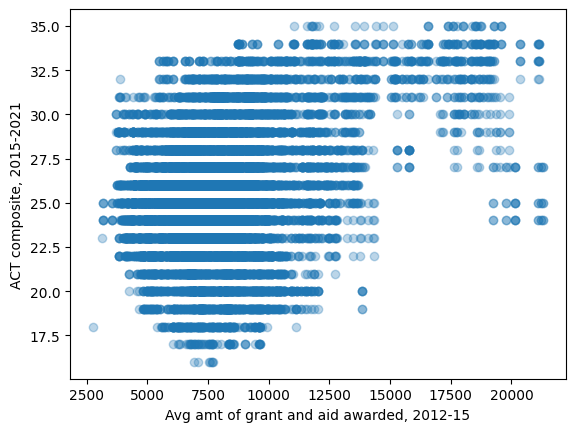

In [15]:
plt.scatter(money_and_scores['avg_award'], money_and_scores['actcm75'], alpha=0.3)
plt.xlabel('Avg amt of grant and aid awarded, 2012-15')
plt.ylabel('ACT composite, 2015-2021')

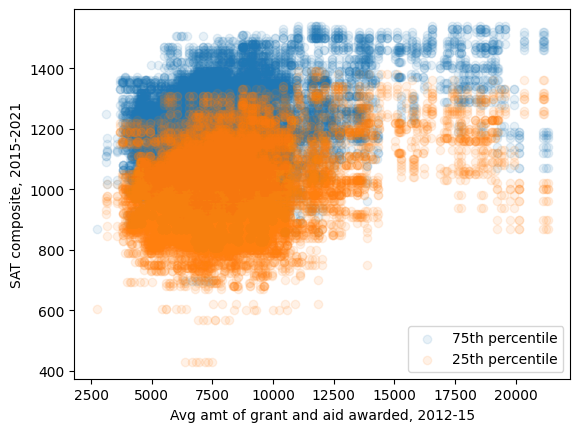

In [16]:
plt.scatter(money_and_scores['avg_award'], money_and_scores['comp_sat75'], alpha=0.1, label='75th percentile')
plt.scatter(money_and_scores['avg_award'], money_and_scores['comp_sat25'], alpha=0.1, label='25th percentile')
plt.xlabel('Avg amt of grant and aid awarded, 2012-15')
plt.ylabel('SAT composite, 2015-2021')
plt.legend()

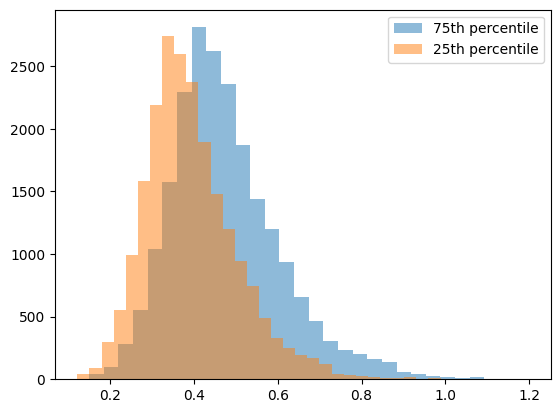

In [17]:
plt.hist(3*money_and_scores['comp_sat75']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='75th percentile')
plt.hist(3*money_and_scores['comp_sat25']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='25th percentile')
plt.legend()

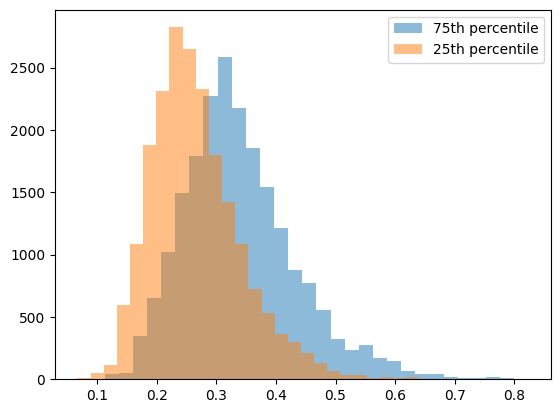

In [18]:
plt.hist(100*money_and_scores['actcm75']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='75th percentile')
plt.hist(100*money_and_scores['actcm25']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='25th percentile')
plt.legend()

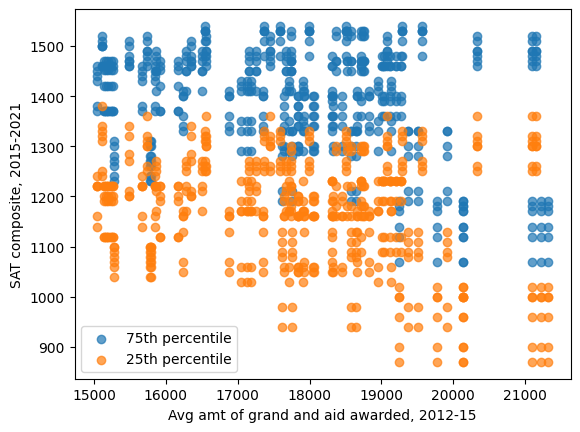

In [19]:
high_awarders = money_and_scores[money_and_scores['avg_award'] >= 15000]
plt.scatter(high_awarders['avg_award'], high_awarders['comp_sat75'], alpha=0.7, label='75th percentile')
plt.scatter(high_awarders['avg_award'], high_awarders['comp_sat25'], alpha=0.7, label='25th percentile')
plt.xlabel('Avg amt of grand and aid awarded, 2012-15')
plt.ylabel('SAT composite, 2015-2021')
plt.legend()

In [20]:
twelve_mo = pd.read_csv('datasets/12-Month Enrollment/EFFY_2015-2021_data.csv', low_memory=False)
twelve_mo.head()

,unitid,effyalev,effylev,lstudy,efytotlt,efytotlm,efytotlw,efyaiant,efyaianm,efyaianw,...,efy2mort,efy2morm,efy2morw,efyunknt,efyunknm,efyunknw,efynralt,efynralm,efynralw,year
0,100654,All students total,All students total,Generated total,6628,2560,4068,18,8,10,...,83,28,55,579,198,381,90,43,47,2021
1,100654,"All students, Undergraduate total",Undergraduate,Undergraduate,5529,2215,3314,15,7,8,...,80,27,53,258,103,155,40,19,21,2021
2,100654,"All students, Undergraduate, Degree/certificat...","Not applicable, undergraduate detail",Undergraduate,5517,2210,3307,15,7,8,...,80,27,53,258,103,155,40,19,21,2021
3,100654,"All students, Undergraduate, Degree/certificat...","Not applicable, undergraduate detail",Undergraduate,1632,677,955,5,2,3,...,32,11,21,70,39,31,5,3,2,2021
4,100654,"All students, Undergraduate, Other degree/cert...","Not applicable, undergraduate detail",Undergraduate,3885,1533,2352,10,5,5,...,48,16,32,188,64,124,35,16,19,2021


In [21]:
pub_dps = pd.merge(public_fin, twelve_mo, on='unitid', how='left')
pub_dps = pd.merge(pub_dps, finaid, on='unitid', how='left')
pub_dps['instruction_per_student'] = pub_dps['f1c011']/pub_dps['efytotlt']
pub_dps['research_per_student'] = pub_dps['f1c021']/pub_dps['efytotlt']
pub_dps['support_per_student'] = pub_dps['f1c051']/pub_dps['efytotlt']
pub_dps['services_per_student'] = pub_dps['f1c061']/pub_dps['efytotlt']

In [22]:
pub_dps['avg_net_price_2012-15'] = (pub_dps['npist0'] + pub_dps['npist1'] + pub_dps['npist2'])/3

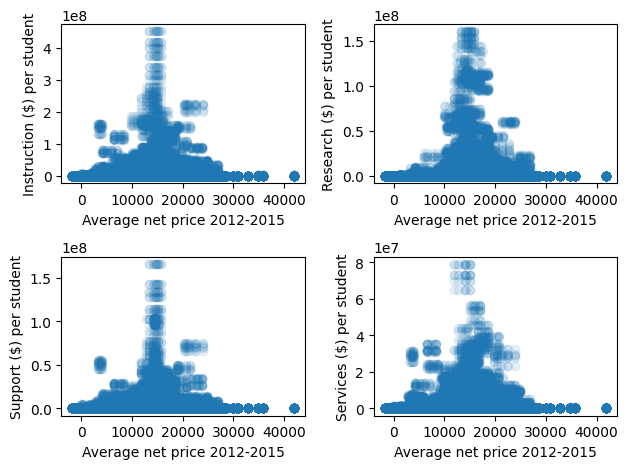

In [23]:
fig, ax = plt.subplots(2, 2)
ax[0,0].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['instruction_per_student'], alpha=0.1)
ax[0,0].set_xlabel('Average net price 2012-2015')
ax[0,0].set_ylabel('Instruction ($) per student')

ax[0,1].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['research_per_student'], alpha=0.1)
ax[0,1].set_xlabel('Average net price 2012-2015')
ax[0,1].set_ylabel('Research ($) per student')

ax[1,0].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['support_per_student'], alpha=0.1)
ax[1,0].set_xlabel('Average net price 2012-2015')
ax[1,0].set_ylabel('Support ($) per student')

ax[1,1].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['services_per_student'], alpha=0.1)
ax[1,1].set_xlabel('Average net price 2012-2015')
ax[1,1].set_ylabel('Services ($) per student')

plt.tight_layout()

In [24]:
pnp_dps = pd.merge(pnp_fin, twelve_mo, on='unitid', how='left')
pnp_dps = pd.merge(pnp_dps, finaid, on='unitid', how='left')
pnp_dps['instruction_per_student'] = pnp_dps['f2e011']/pnp_dps['efytotlt']
pnp_dps['research_per_student'] = pnp_dps['f2e021']/pnp_dps['efytotlt']
pnp_dps['support_per_student'] = pnp_dps['f2e041']/pnp_dps['efytotlt']
pnp_dps['services_per_student'] = pnp_dps['f2e051']/pnp_dps['efytotlt']

pnp_dps['avg_net_price_2012-15'] = (pnp_dps['npist0'] + pnp_dps['npist1'] + pnp_dps['npist2'])/3

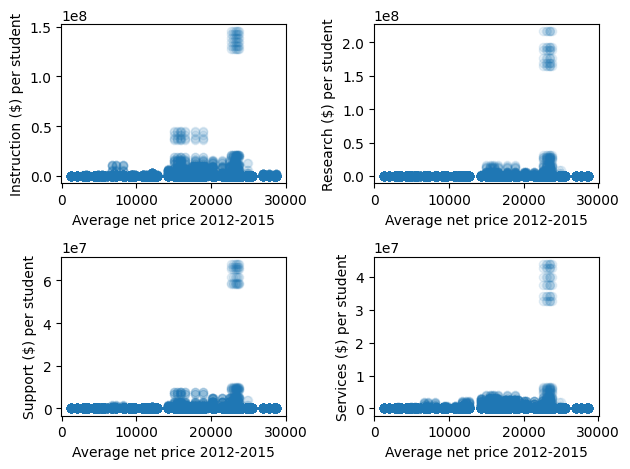

In [25]:
fig, ax = plt.subplots(2, 2)
ax[0,0].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['instruction_per_student'], alpha=0.1)
ax[0,0].set_xlabel('Average net price 2012-2015')
ax[0,0].set_ylabel('Instruction ($) per student')

ax[0,1].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['research_per_student'], alpha=0.1)
ax[0,1].set_xlabel('Average net price 2012-2015')
ax[0,1].set_ylabel('Research ($) per student')

ax[1,0].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['support_per_student'], alpha=0.1)
ax[1,0].set_xlabel('Average net price 2012-2015')
ax[1,0].set_ylabel('Support ($) per student')

ax[1,1].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['services_per_student'], alpha=0.1)
ax[1,1].set_xlabel('Average net price 2012-2015')
ax[1,1].set_ylabel('Services ($) per student')

plt.tight_layout()